<a href="https://colab.research.google.com/github/amitarav16/deep_learning/blob/master/mnist_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
#loading the dataset
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
#normalizing the inputs
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_train = x_train.astype('float32')
x_train = x_train/255
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_test = x_test.astype('float32')
x_test = x_test/255

In [7]:
#creating model
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Dropout(0.25),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128,activation='relu'),
                                   tf.keras.layers.Dense(10,activation='softmax')])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
____

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [0]:
#compiling the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
#training the model
model.fit(x_train,y_train,epochs=15,batch_size=128,verbose=2)

Epoch 1/15
60000/60000 - 41s - loss: 0.2155 - acc: 0.9363
Epoch 2/15
60000/60000 - 41s - loss: 0.0608 - acc: 0.9811
Epoch 3/15
60000/60000 - 40s - loss: 0.0433 - acc: 0.9865
Epoch 4/15
60000/60000 - 41s - loss: 0.0354 - acc: 0.9890
Epoch 5/15
60000/60000 - 41s - loss: 0.0290 - acc: 0.9909
Epoch 6/15
60000/60000 - 41s - loss: 0.0241 - acc: 0.9919
Epoch 7/15
60000/60000 - 41s - loss: 0.0204 - acc: 0.9934
Epoch 8/15
60000/60000 - 40s - loss: 0.0178 - acc: 0.9940
Epoch 9/15
60000/60000 - 40s - loss: 0.0170 - acc: 0.9943
Epoch 10/15
60000/60000 - 40s - loss: 0.0135 - acc: 0.9957
Epoch 11/15
60000/60000 - 40s - loss: 0.0119 - acc: 0.9962
Epoch 12/15
60000/60000 - 40s - loss: 0.0111 - acc: 0.9962
Epoch 13/15
60000/60000 - 39s - loss: 0.0097 - acc: 0.9964
Epoch 14/15
60000/60000 - 40s - loss: 0.0095 - acc: 0.9968
Epoch 15/15
60000/60000 - 40s - loss: 0.0085 - acc: 0.9971


In [13]:
#evaluating the model
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 3s 270us/sample - loss: 0.0241 - acc: 0.9929


[0.024113797411325185, 0.9929]

9


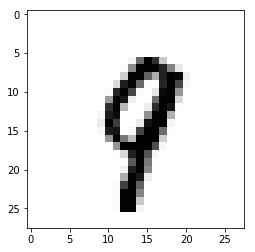

In [21]:
#Let's now test it ourself
import random
image_index = random.randint(1,10000)
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())